### Code for statistical tests to compare metrics across different experimental setups

In [ ]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import sys
from scipy.stats import ranksums

import numpy as np
import statsmodels.api as statmod
import matplotlib.pyplot as plt

In [5]:
# # df_final_data = pd.read_csv('results/new_results_3/SE/final_data_100.csv')
# run = str(runs[7])
# df_results_high = pd.read_csv('results/final_results/TOL/results_' + run + '0.csv')
# df_results_med = pd.read_csv('results/final_results/TOL/results_' + run + '1.csv')
# df_results_low = pd.read_csv('results/final_results/TOL/results_' + run + '2.csv')
# df_results_high.columns

In [6]:
df_1 = pd.read_csv('results/final_results/SE_avg/results_none.csv')
df_2 = pd.read_csv('results/final_results/SE_avg/results_high.csv')
df_3 = pd.read_csv('results/final_results/SE_avg/results_med.csv')
df_4 = pd.read_csv('results/final_results/SE_avg/results_low.csv')

In [ ]:
# df_1 = pd.read_csv('results/final_results/TOL_avg/TOL_high_avg.csv')
# df_2 = pd.read_csv('results/final_results/TOL_avg/TOL_med_avg.csv')
# df_3 = pd.read_csv('results/final_results/TOL_avg/TOL_low_avg.csv')

In [ ]:
df_1.columns

In [ ]:
# stats.f_oneway(df_1['net_polarization2'].iloc[0:10], df_2['net_polarization2'].iloc[0:10], df_3['net_polarization2'].iloc[0:10], df_4['net_polarization2'].iloc[0:10])
# stats.f_oneway(df_1['net_polarization2'], df_2['net_polarization2'])

In [126]:
# #create dataset with 100 values that follow a normal distribution
# data = np.random.normal(0,1,100)
# #create Q-Q plot with 45-degree line added to plot
# fig = statmod.qqplot(data, line='45')
# plt.show()

## Initial Population's Basic Distribution stats

In [ ]:
from scipy.stats import skew, kurtosis

kur_ua, kur_pov, kur_pp = [], [], []
avg_pp, avg_pol, avg_ua = [], [], []
std_pp, std_pol, std_ua = [], [], []
for i in range(1,11):
    data = pd.read_csv('src/data/initial_data_' + str(i) + '.csv')
#     print(kurtosis(data['user_activity'], bias=False), kurtosis(data['pol_inclination'], bias=False))
    avg_pp.append(data['privacy_preference'].mean())
    std_pp.append(data['privacy_preference'].std())
    avg_pol.append(data['pol_inclination'].mean())
    std_pol.append(data['pol_inclination'].std())
    avg_ua.append(data['user_activity'].mean())
    std_ua.append(data['user_activity'].std())
    kur_ua.append(kurtosis(data['user_activity'], bias=False))
    kur_pov.append(kurtosis(data['pol_inclination'], bias=False))
    kur_pp.append(kurtosis(data['privacy_preference'], bias=False))
    
print(sum(kur_ua)/len(kur_ua), sum(kur_pov)/len(kur_pov), sum(kur_pp)/len(kur_pp))
print(sum(avg_ua)/len(avg_ua), sum(avg_pol)/len(avg_pol), sum(avg_pp)/len(avg_pp))
print(sum(std_ua)/len(std_ua), sum(std_pol)/len(std_pol), sum(std_pp)/len(std_pp))

In [ ]:
df_1['net_polarization2'].describe()

## Normality Test

In [127]:
from scipy import stats
import matplotlib.pyplot as plt

In [128]:
final_data = pd.read_csv('results/final_results/SE_avg/final_data_low.csv')
initial_data = pd.read_csv('src/data/initial_data_1.csv')
final_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'user_activity', 'pol_interest',
       'privacy_preference', 'user_satisfaction', 'issue_0', 'issue_1',
       'issue_2', 'issue_3', 'issue_4', 'issue_5', 'pol_inclination'],
      dtype='object')

In [129]:
final_data['pov_change'] = final_data['pol_inclination'] - initial_data['pol_inclination']

In [130]:
final_data['pov_change'].describe()

count    4039.000000
mean       -0.002544
std         0.226337
min        -0.787282
25%        -0.153408
50%        -0.001036
75%         0.149737
max         0.766891
Name: pov_change, dtype: float64

In [131]:
final_data1 = pd.read_csv('results/final_results/TOL_avg/final_data_low.csv')
final_data2 = pd.read_csv('results/final_results/TOL_avg/final_data_high.csv')

/home/ahaque2/venv/new_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


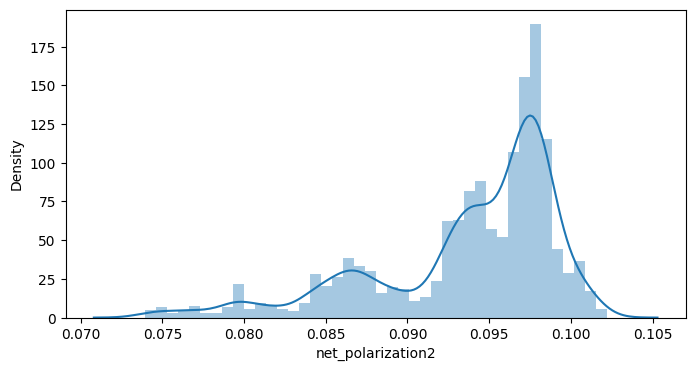

In [146]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot()
import seaborn as sns
sns.distplot(df1['net_polarization2'],ax=ax)
# sns.distplot(final_data1['pol_inclination'],ax=ax)
plt.show()

ShapiroResult(statistic=0.7773240804672241, pvalue=0.0)

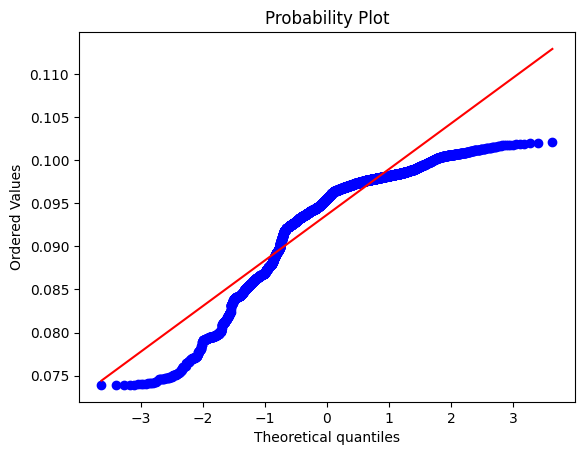

In [148]:
stats.probplot(df1['net_polarization2'], dist="norm", plot=plt)
stats.shapiro(df2['net_polarization2'])
# stats.probplot(df_1['network_polarization'], dist="norm", plot=plt)

ShapiroResult(statistic=0.9997969269752502, pvalue=0.980003833770752)

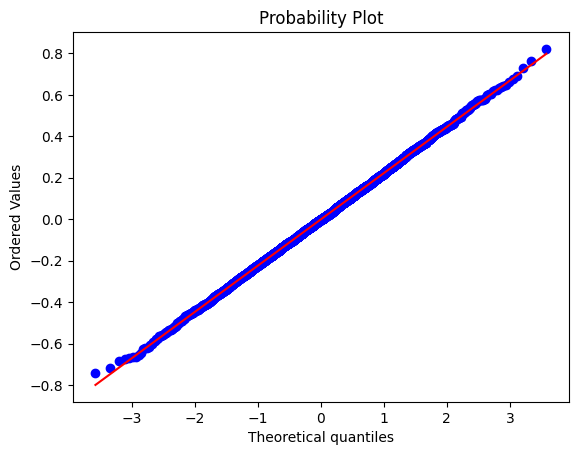

In [149]:
stats.probplot(initial_data['pol_inclination'], dist="norm", plot=plt)
stats.shapiro(initial_data['pol_inclination'])

In [156]:
none_se_data.columns

Index(['Unnamed: 0', 'party_mentioned', 'post_stance', 'author_id',
       'num_of_agents_received', 'num_of_agents_not_received',
       'num_of_spreader_agents', 'num_of_disinterested_agents',
       'network_polarization', 'net_polarization2', 'network_homophily',
       'network_homophily2', 'network_polarity', 'user_satisfaction',
       'user_activity'],
      dtype='object')

## Non-parametric Statistical Significance Testing (Comparing overall network metrics for different levels of SE and TOL)

In [162]:
from scipy.stats import kruskal
none_se_data = pd.read_csv('results/final_results/SE_avg/results_none.csv')
attr = 'net_polarization2'
for se_lev in ['low', 'med', 'high']:
    final_data = pd.read_csv('results/final_results/SE_avg/results_' + se_lev + '.csv')
    print(se_lev, "\t", kruskal(none_se_data[attr], final_data[attr]))
    print()

low 	 KruskalResult(statistic=1336.617654101415, pvalue=1.2467413238513168e-292)

med 	 KruskalResult(statistic=2918.2246779537986, pvalue=0.0)

high 	 KruskalResult(statistic=4317.151698007525, pvalue=0.0)



In [211]:
from pingouin import kruskal
none_se_data = pd.read_csv('results/final_results/SE_avg/results_none.csv')
attr = 'network_homophily'
for se_lev in ['low', 'med', 'high']:
    final_data = pd.read_csv('results/final_results/SE_avg/results_' + se_lev + '.csv')
    none_se_data['SE_level'] = ['none'] * none_se_data.shape[0]
    final_data['SE_level'] = [se_lev] * final_data.shape[0]
    temp_df = pd.concat((none_se_data, final_data), axis = 0)
    kwTest = kruskal(temp_df, dv=attr, between='SE_level')
    H = kwTest.H[0]
    n = temp_df.shape[0]
    esq = H * (n + 1)/(n**2 - 1)
    print(se_lev, "\t", kwTest, "\t", esq)

low 	            Source  ddof1         H     p-unc
Kruskal  SE_level      1  4.001361  0.045464 	 0.0004008174769952874
med 	            Source  ddof1            H  p-unc
Kruskal  SE_level      1  1813.118253    0.0 	 0.18162058032905157
high 	            Source  ddof1            H  p-unc
Kruskal  SE_level      1  6349.251004    0.0 	 0.6360063110943485


In [228]:
attrs = ['net_polarization2', 'network_homophily', 'network_polarity', 'user_satisfaction']

In [246]:
from pingouin import kruskal
none_se_data = pd.read_csv('results/final_results/SE_avg/results_none.csv')
attr = attrs[1]
for se_lev in ['low', 'med', 'high']:
    final_data = pd.read_csv('results/final_results/SE_avg/results_' + se_lev + '.csv')
    none_se_data['SE_level'] = ['none'] * none_se_data.shape[0]
    final_data['SE_level'] = [se_lev] * final_data.shape[0]
    temp_df = pd.concat((none_se_data, final_data), axis = 0)
    kwTest = kruskal(temp_df, dv=attr, between='SE_level')
    H = kwTest.H[0]
    n = temp_df.shape[0]
    esq = H * (n + 1)/(n**2 - 1)
    print(se_lev, "\t", kwTest, "\t", esq)

low 	            Source  ddof1         H     p-unc
Kruskal  SE_level      1  4.001361  0.045464 	 0.0004008174769952874
med 	            Source  ddof1            H  p-unc
Kruskal  SE_level      1  1813.118253    0.0 	 0.18162058032905157
high 	            Source  ddof1            H  p-unc
Kruskal  SE_level      1  6349.251004    0.0 	 0.6360063110943485


In [247]:
from pingouin import kruskal
attr = attrs[1]
for tol_lev in [('low', 'med'), ('med', 'high'), ('low', 'high')]:
    tol1 = tol_lev[0]
    tol2 = tol_lev[1]
    df1 = pd.read_csv('results/final_results/TOL_avg/results_' + tol1 + '.csv')
    df2 = pd.read_csv('results/final_results/TOL_avg/results_' + tol2 + '.csv')
    df1['TOL_level'] = [tol1] * df1.shape[0]
    df2['TOL_level'] = [tol2] * df2.shape[0]
    temp_df = pd.concat((df1, df2), axis = 0)
    kwTest = kruskal(temp_df, dv=attr, between='TOL_level')
    H = kwTest.H[0]
    n = temp_df.shape[0]
    esq = H * (n + 1)/(n**2 - 1)
    print((tol1, tol2), "\t", kwTest, "\t", esq)
#     print(tol_lev, "\t", kruskal(df1[attr].iloc[0:1000], df2[attr].iloc[0:1000]))
    print()

('low', 'med') 	             Source  ddof1         H         p-unc
Kruskal  TOL_level      1  67.88436  1.733709e-16 	 0.006799995983187317

('med', 'high') 	             Source  ddof1            H  p-unc
Kruskal  TOL_level      1  1516.767743    0.0 	 0.1519350639494953

('low', 'high') 	             Source  ddof1            H  p-unc
Kruskal  TOL_level      1  1981.182428    0.0 	 0.19845561738521003



In [ ]:
none_se_data.columns

## Parametric Statistical Significance Testing (Comparing user attributes across different levels of SE)

In [151]:
from scipy.stats import ttest_rel, f_oneway

In [242]:
initial_data = pd.read_csv('src/data/initial_data_1.csv')
none_se_data = pd.read_csv('results/final_results/SE_avg/final_data_none.csv')
attr = 'pol_inclination'
for se_lev in ['low', 'med', 'high']:
    final_data = pd.read_csv('results/final_results/SE_avg/final_data_' + se_lev + '.csv')
    print(se_lev, "\t", ttest_rel(none_se_data[attr], final_data[attr]))
    print(se_lev, "\t", f_oneway(none_se_data[attr], final_data[attr]))
    none_se_data['SE_level'] = ['none'] * none_se_data.shape[0]
    final_data['SE_level'] = [se_lev] * final_data.shape[0]
    temp_df = pd.concat((none_se_data, final_data), axis = 0)
    print(galss_delta(temp_df, attr, 'SE_level'))
    print(cohens_d(temp_df, attr, 'SE_level'))
    print()

low 	 Ttest_relResult(statistic=1.0273168400388961, pvalue=0.30433282857493105)
low 	 F_onewayResult(statistic=0.5605161888504171, pvalue=0.4540741402239643)
0.016302474410757266
0.016659890839619156

med 	 Ttest_relResult(statistic=10.200659283467873, pvalue=3.855022383023229e-24)
med 	 F_onewayResult(statistic=57.66599097199965, pvalue=3.453563245136152e-14)
0.16144886609804374
0.1689810292623314

high 	 Ttest_relResult(statistic=3.99132138563572, pvalue=6.687277113839638e-05)
high 	 F_onewayResult(statistic=9.4765112380721, pvalue=0.0020881732525850263)
0.06478228989646945
0.0685018518573343



In [241]:
initial_data = pd.read_csv('src/data/initial_data_1.csv')
attr = 'pol_inclination'
for tol_lev in [('low', 'med'), ('med', 'high'), ('low', 'high')]:
    tol1 = tol_lev[0]
    tol2 = tol_lev[1]
    df1 = pd.read_csv('results/final_results/TOL_avg/final_data_' + tol1 + '.csv')
    df2 = pd.read_csv('results/final_results/TOL_avg/final_data_' + tol2 + '.csv')
    
    print(tol_lev, "\t", ttest_rel(df1[attr], df2[attr]))
    print(tol_lev, "\t", f_oneway(df1[attr], df2[attr]))
    df1['TOL_level'] = [tol1] * df1.shape[0]
    df2['TOL_level'] = [tol2] * df2.shape[0]
    temp_df = pd.concat((df1, df2), axis = 0)
    print(galss_delta(temp_df, attr, 'TOL_level'))
    print(cohens_d(temp_df, attr, 'TOL_level'))
    print()

('low', 'med') 	 Ttest_relResult(statistic=1.3458769974450495, pvalue=0.17841774531539958)
('low', 'med') 	 F_onewayResult(statistic=1.076195442338444, pvalue=0.2995812824927048)
0.022459804982167243
0.02308466866509659

('med', 'high') 	 Ttest_relResult(statistic=0.7228518384522137, pvalue=0.46981277930647525)
('med', 'high') 	 F_onewayResult(statistic=0.2614795180483579, pvalue=0.6091195029813835)
0.0116176558996652
0.011378811660922035

('low', 'high') 	 Ttest_relResult(statistic=2.058895338652016, pvalue=0.03956826421359188)
('low', 'high') 	 F_onewayResult(statistic=2.412527050961528, pvalue=0.12040710290046534)
0.03637002963351754
0.034563217721917304



In [79]:
temp_df['SE_level'].value_counts()

none    1000
high    1000
Name: SE_level, dtype: int64

# Effect Size

In [107]:
var1 = 'low'
var2 = 'high'
attr = 'net_polarization2'
exp = 'TOL'

df1 = pd.read_csv('results/final_results/' + exp +'_avg/results_' + var1 + '.csv')
df2 = pd.read_csv('results/final_results/' + exp +'_avg/results_' + var2 + '.csv')
df1['EXP'] = [var1] * df1.shape[0]
df2['EXP'] = [var2] * df2.shape[0]
temp_df = pd.concat((df1.iloc[0:1000], df2.iloc[0:1000]), axis = 0)

### Cohen's d

In [108]:
import numpy as np

def cohens_d(df, attr, control_var):

    # Variances
    variances = df.groupby(control_var).var(ddof=1)
    # Mean variance
    mean_var = variances.mean()[attr]
    # Pooled standard deviation
    s_pooled = np.sqrt(mean_var)
    # Difference of the means
    diff_mean = abs(df.groupby(control_var).mean().diff()[attr][-1])
    # Cohen's d
    cohens_d = diff_mean / s_pooled
    
    return cohens_d

cohens_d(temp_df, 'net_polarization2', 'EXP')

1.1741784287985104

In [ ]:
# import numpy as np
# import pingouin as pg
# x = temp_df[temp_df['EXP'] == var1][attr]
# y = temp_df[temp_df['EXP'] == var2][attr]
# pg.compute_effsize(x, y, paired=False, eftype='cohen')

### Glass's delta

In [179]:
# Variances
def galss_delta(df, attr, control_var):
    
    variances = df.groupby(control_var).var(ddof=1)
    # Difference of the means
    diff_mean = abs(df.groupby(control_var).mean().diff()[attr][-1])
    # Glass's delta
    glasss_delta = diff_mean / np.sqrt(variances[attr].to_list()[0])

    return glasss_delta

# galss_delta(temp_df, 'net_polarization2', 'EXP')

### Epsilon Square (For Kruskal-Wallis test)

In [110]:
from pingouin import kruskal
def epsilon_square(df, attr, control_var):

    kwTest = kruskal(df, dv=attr, between=control_var)
    H = kwTest.H[0]
    n = df.shape[0]
    esq = H * (n + 1)/(n**2 - 1)
    print(esq)
    
epsilon_square(temp_df, 'net_polarization2', 'EXP')

0.2524845375865879


In [207]:
none_se_data.columns, med_tol_data.columns

(Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'user_activity', 'pol_interest',
        'privacy_preference', 'user_satisfaction', 'issue_0', 'issue_1',
        'issue_2', 'issue_3', 'issue_4', 'issue_5', 'pol_inclination',
        'SE_level'],
       dtype='object'),
 Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'user_activity', 'pol_interest',
        'privacy_preference', 'user_satisfaction', 'issue_0', 'issue_1',
        'issue_2', 'issue_3', 'issue_4', 'issue_5', 'pol_inclination',
        'SE_level'],
       dtype='object'))

In [208]:
from pingouin import kruskal
none_se_data = pd.read_csv('results/final_results/SE_avg/final_data_none.csv')
med_tol_data = pd.read_csv('results/final_results/TOL_avg/final_data_med.csv')
attr = 'pol_inclination'

none_se_data['SE_level'] = ['none'] * none_se_data.shape[0]
med_tol_data['SE_level'] = ['med'] * med_tol_data.shape[0]
temp_df = pd.concat((none_se_data, med_tol_data), axis = 0)
kwTest = kruskal(temp_df, dv=attr, between='SE_level')
H = kwTest.H[0]
n = temp_df.shape[0]
esq = H * (n + 1)/(n**2 - 1)
print(se_lev, "\t", kwTest, "\t", esq)

high 	            Source  ddof1         H     p-unc
Kruskal  SE_level      1  2.396003  0.121646 	 0.0002966451962983735
